In [1]:
import json

with open("../data/bert/bfn_lu_embs.json") as fp:
    src_embs = json.load(fp)
    
with open("../data/bert/spanishfn_lu_embs.json") as fp:
    tgt_embs  = json.load(fp)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


def plot_similar_word(src_vecs, tgt_vecs, src_labels, tgt_labels):
    all_vecs = np.vstack([src_vecs, tgt_vecs])
    labels = src_labels + tgt_labels

    # find tsne coords for 2 dimensions
    print('started')
    X = TSNE(n_components=2, perplexity=3, metric='cosine').fit_transform(all_vecs)
    print('transformed')
    x_coords = X[:, 0]
    y_coords = X[:, 1]

    # display scatter plot
    plt.figure(figsize=(10, 8), dpi=80)
    plt.scatter(x_coords, y_coords, marker='x')

    for k, (label, x, y) in enumerate(zip(labels, x_coords, y_coords)):
        color = 'blue' if k < len(src_vecs) else 'red'  # src words in blue / tgt words in red
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=19,
                     color=color, weight='bold')

#     plt.xlim(x_coords.min() - 0.2, x_coords.max() + 0.2)
#     plt.ylim(y_coords.min() - 0.2, y_coords.max() + 0.2)
#     plt.title('Visualization of the multilingual word embedding space')

    plt.show()


In [3]:
def load_vec(emb_dict):
    vectors = []
    word2id = {}
    
    
    word2id = {k:i for i, k in enumerate(emb_dict.keys())}        
    id2word = {v: k for k, v in word2id.items()}
    embeddings = np.vstack(list(emb_dict.values()))

    return embeddings, id2word, word2id

In [4]:
src_embs, src_id2word, src_word2id = load_vec(src_embs)
tgt_embs, tgt_id2word, tgt_word2id = load_vec(tgt_embs)

In [5]:
def get_nn(word, src_emb, src_id2word, tgt_emb, tgt_id2word, K=5):
    print("Nearest neighbors of \"%s\":" % word)
    word2id = {v: k for k, v in src_id2word.items()}
    word_emb = src_emb[word2id[word]]
    scores = (tgt_emb / np.linalg.norm(tgt_emb, 2, 1)[:, None]).dot(word_emb / np.linalg.norm(word_emb))
    k_best = scores.argsort()[-K:][::-1]
    for i, idx in enumerate(k_best):
        print('%.4f - %s' % (scores[idx], tgt_id2word[idx]))

In [6]:
import random

w = random.choice(list(tgt_word2id.keys()))
print(w)

get_nn(w, tgt_embs, tgt_id2word, src_embs, src_id2word, K=5)

1075
Nearest neighbors of "1075":
0.5222 - 13793
0.5171 - 13794
0.5033 - 16613
0.4967 - 11226
0.4967 - 7465


In [7]:
import random

# src_labels = random.sample(list(src_embs.keys()), k=35)
# tgt_labels = random.sample(list(tgt_embs.keys()), k=35)

# src_vecs = [src_embs[l] for l in src_labels]
# tgt_vecs = [tgt_embs[l] for l in tgt_labels]

src_labels = ['Risky_situation.dangerous.a', 'Size.colossal.a', 'Similarity.different.a', 'Identicality.same.a', 'Businesses.company.n']
tgt_labels = ['Risky_situation.peligroso.a', 'Similarity.diferente.a', 'Businesses.empresa.n']

src_ids = ['13379', '17861', '7989', '10293', '11113']
tgt_ids = ['2491', '2329', '2392']

src_vecs = [src_embs[src_word2id[i]] for i in  src_ids]
tgt_vecs = [tgt_embs[tgt_word2id[i]] for i in  tgt_ids]


started
transformed


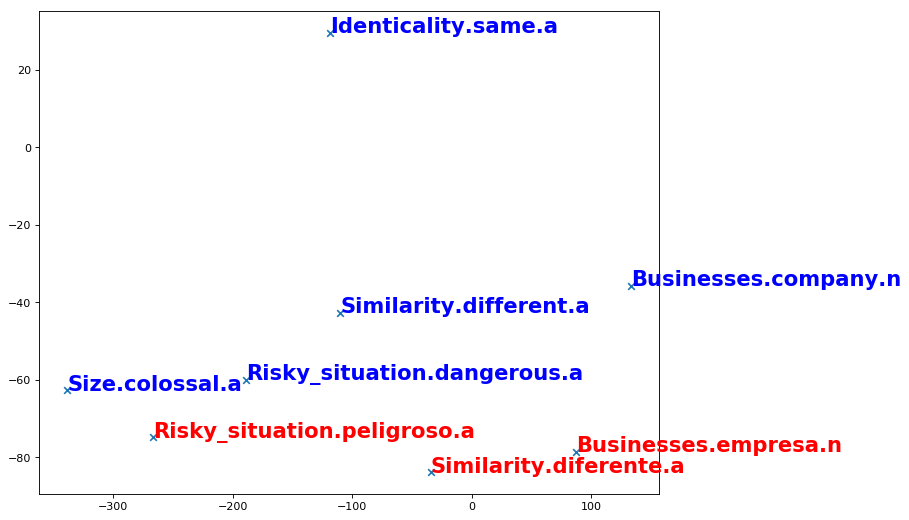

In [23]:
plot_similar_word(src_vecs, tgt_vecs, src_labels, tgt_labels)

In [9]:
tgt_word2id['2906']

915